In [71]:
import numpy
import tensorflow
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.dates as dates
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [72]:
def import_dataframe(file, columns):
    data = pandas.read_csv(filepath_or_buffer=file, sep=';', usecols=columns)
    return data

In [73]:
def plot_dataframe(x, y, color):
    pyplot.figure(figsize=(25,7), frameon=False, edgecolor='black')
    pyplot.title('Sunspots per Month')
    pyplot.xlabel('Year')
    pyplot.ylabel('Sunspots')
    pyplot.scatter(x=x, y=y, color=color)
    pyplot.show()

In [74]:
def dataset_from_dataframe(x, y):
    y = y.values.reshape(-1,1)
    return x, y

In [75]:
def scale_dataset(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler, scaler.fit_transform(dataset)

def scale_inv_dataset(scaler, dataset):
    return scaler.inverse_transform(dataset)

In [76]:
def prepare_dataset(dataset, depth):
    data_x, data_y = [], []
    for i in range(len(dataset)):
        if i + depth < len(dataset):
            data_y.append(dataset[i + depth, 0])
        else: 
            data_y.append(0)
        a = dataset[i:(i+depth), 0]
        data_x.append(a)
    return numpy.array(data_x), numpy.array(data_y)

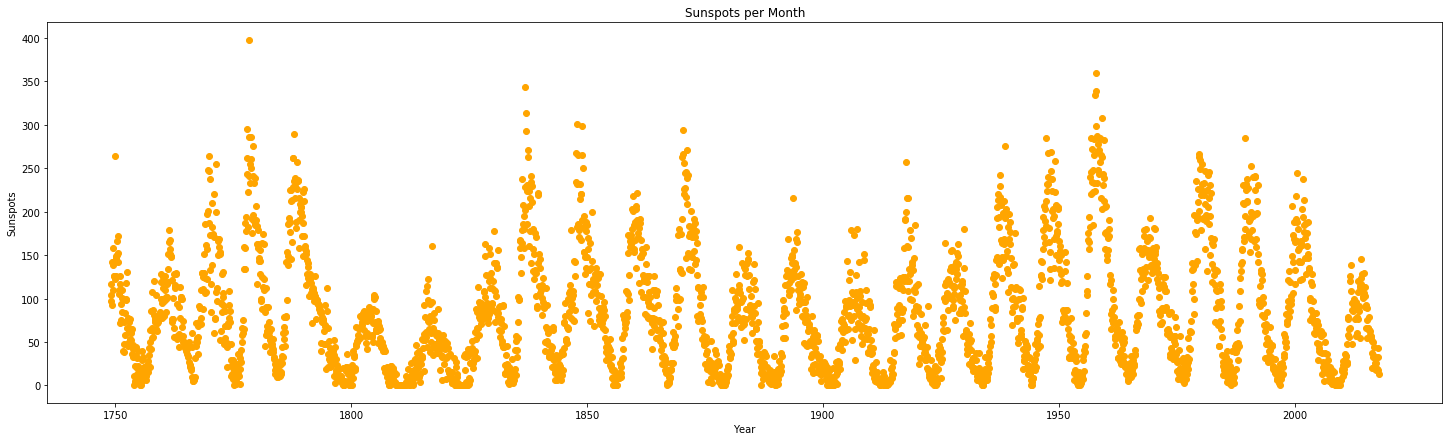

[[ 0.24284278]
 [ 0.26192868]
 [ 0.2930688 ]
 ..., 
 [ 0.18910097]
 [ 0.34957308]
 [ 0.30738324]]
[ 0.26192868  0.2930688   0.23304872 ...,  0.34957308  0.30738324  0.        ]


In [77]:
DATEFRACTION = 'DATEFRACTION'
DATEFRACTION_COLUMN = 2
SSN = 'SSN'
SSN_COLUMN = 3

dataframe = import_dataframe('SN_m_tot_V2.0_header.csv', [DATEFRACTION_COLUMN, SSN_COLUMN])
plot_dataframe(dataframe[DATEFRACTION], dataframe[SSN], 'orange')

dataset_x, dataset_y = dataset_from_dataframe(dataframe[DATEFRACTION], dataframe[SSN])
scaler, dataset_y = scale_dataset(dataset_y.astype('float32'))

train_size = int(len(dataset_y) * 0.6666)
test_size = len(dataset_y) - train_size
train_set = dataset_y[0:train_size]
test_set = dataset_y[train_size:]

train_x, train_y = prepare_dataset(train_set, 1)
test_x, test_y = prepare_dataset(test_set, 1)

print(train_x)
print(train_y)

In [ ]:
def lstm_cell(hidden_layer_size, batch_size, layer_depth, dropout_rate, dropout=True):
    layers = []
    
    for i in range(layer_depth):
        layer = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer_size)
        if dropout:
            layer = tf.contrib.rnn.DropoutWrapper(layer, output_keep_prob=dropout_rate)
        layers.append(layer)
    
    cell = tf.contrib.rnn.MultiRNNCell(layers)
    init_state = cell.zero_state(batch_size, tf.float32)
    
    return cell, init_state

In [ ]:
def lstm_output_layer(lstm_output, in_size, out_size):
    x = lstm_output(:, -1, :)
    weights = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.05), name='output_layer_weights')
    bias = trf.Variable(tf.zeros([out_size]), name='output_layer_bias')
    output = tf.matmul(x, weights) + bias
    
    return output

In [ ]:
def lstm_loss(logits, targets, learning_rate, grad_clip_margin):
    losses = []
    
    for i in range(targets.get_shape()[0]):
        losses.append([tf.pow(logits[i] - targets[i], 2)])
        
    loss = tf.reduce_sum(losses)/(2*batch_size)
    
    gradients = tf.gradients(loss, tf.trainable_variables())
    clipper, _ = tf.clip_by_global_norm(gradients, grad_clip_margin)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))
    return loss, train_optimizer

In [ ]:
def rnn_model(cell, init_state):
    inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='inputs')
    targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')
    outputs, states = tf.nn.dynamic_rnn(cell, inputs, inital_state=init_state)
    
    return inputs, targets, outputs, states

In [ ]:
def train_model(x, y, batch_size, inputs, targets, logits, loss, optimizer):
    epoch_scores, epoch_loss = []
    
    for i in range(0, len(x) - batch_size, batch_size):
        batch_x = x[i:i+batch_size]
        batch_y = y[i:i+batch_size]
        
        session_output, session_loss, _ = session.run([logits, loss, optimizer], feed_dict={inputs:batch_x, targets:batch_y})
        
        epoch_loss.append(session_loss)
        scores.append(session_output)
        
    return epoch_scores, epoch_loss

In [ ]:
cell, init_state = lstm_cell(...)
inputs, targets, outputs, states = rnn_model(cell, init_state)
logits = lstm_output_layer(outputs, ...)
loss, train_optimizer = lstm_loss(logits, targets, ...)

tf.reset_default_graph()
session = tf.Session()
session_run(tf.global_variables_initializer())

In [ ]:
for i in range(epochs):
    epoch_scores, epoch_loss = train_model(train_x, train_y, ...)
    #print
